# Customer Churn Prediction 

### Customer churn prediction refers to the process of identifying customers who are likely to stop using a product or service in the near future. It is a valuable predictive analytics technique used by businesses to forecast customer behavior and take proactive measures to retain customers.

### Objective : objective of this project is to predict wather customer is about to churn or not.


### Kaggle Dataset Link :
https://www.kaggle.com/datasets/blastchar/telco-customer-churn
(https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import Dataset

df = pd.read_csv("Telco-Customer-Churn.csv")
df_copy = df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#since total changes is having numerical value but dtype is object to change it.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Exploratory Data Analysis :

<AxesSubplot:xlabel='Churn', ylabel='count'>

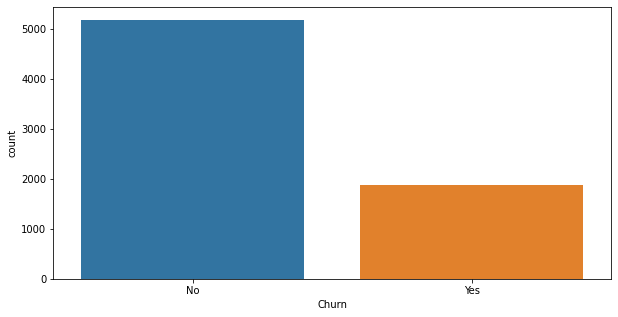

In [8]:
plt.figure(figsize=(10,5));
sns.countplot(data=df,x='Churn')

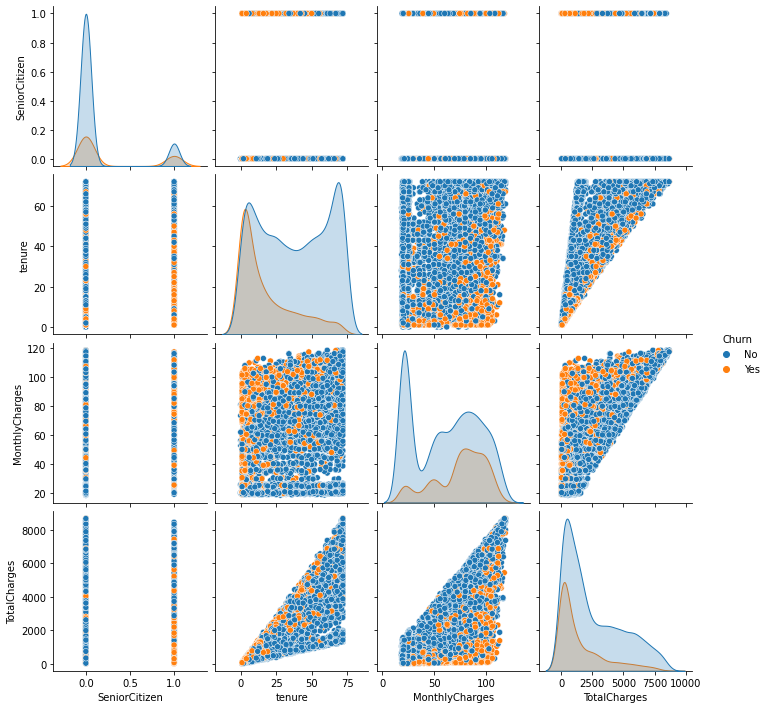

In [9]:
sns.pairplot(data=df,hue="Churn")

<AxesSubplot:xlabel='gender', ylabel='count'>

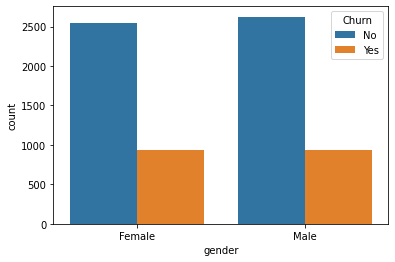

In [10]:
sns.countplot(x='gender',data=df,hue='Churn')

In [11]:
temp = pd.crosstab(df["gender"],df["Churn"])

<AxesSubplot:xlabel='gender'>

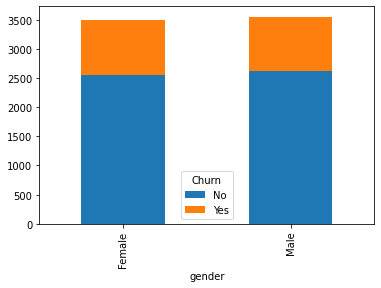

In [12]:
temp.plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

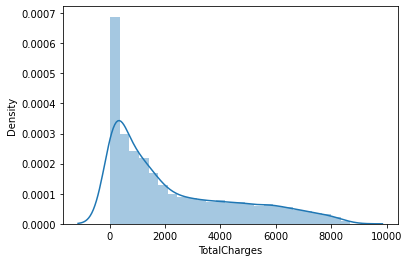

In [13]:
sns.distplot(df["TotalCharges"])

<AxesSubplot:xlabel='TotalCharges'>

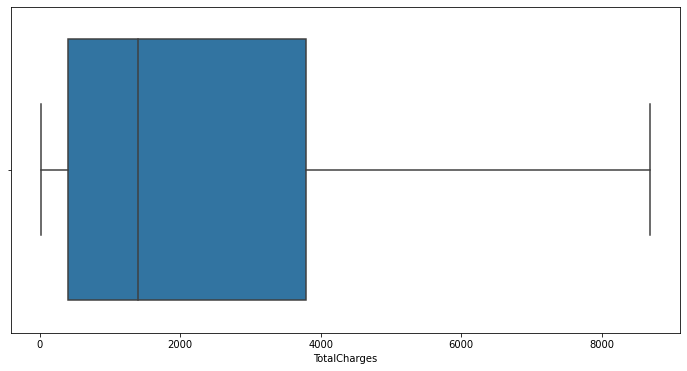

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x="TotalCharges",data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

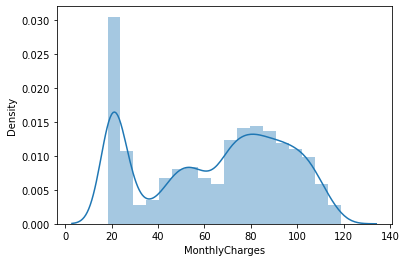

In [15]:
sns.distplot(df["MonthlyCharges"])

<AxesSubplot:xlabel='MonthlyCharges'>

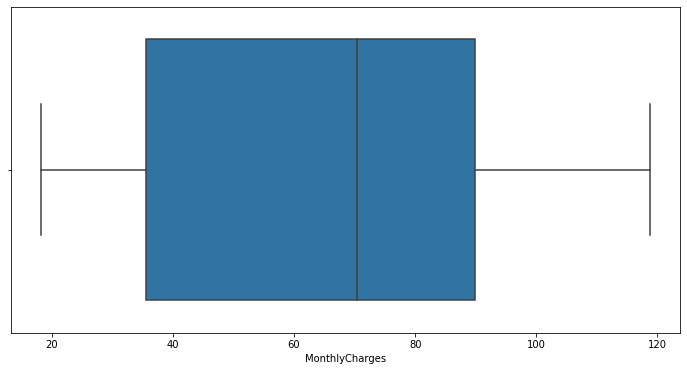

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x="MonthlyCharges",data=df)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

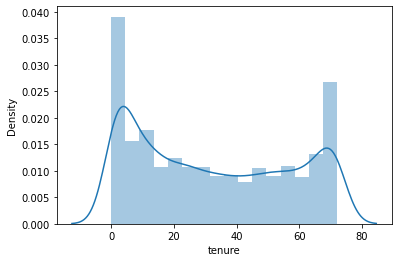

In [17]:
sns.distplot(df["tenure"])

<AxesSubplot:xlabel='tenure'>

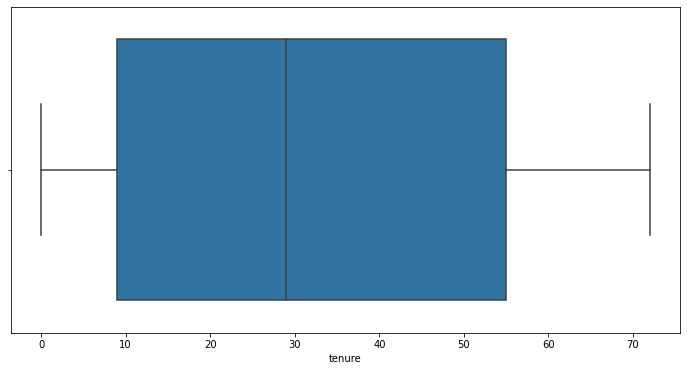

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x="tenure",data=df)

### After plotting histogram and boxplot we found that there is no outlier present in numeric dataset so wedon't need to do any kind of outlier treatment.

# Univariate Analysis

In [19]:
cat_features = list(df.select_dtypes(include="object").columns)
cat_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [20]:
cat_features.remove('customerID')
cat_features.remove('Churn')
cat_features.append('SeniorCitizen')

In [21]:
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

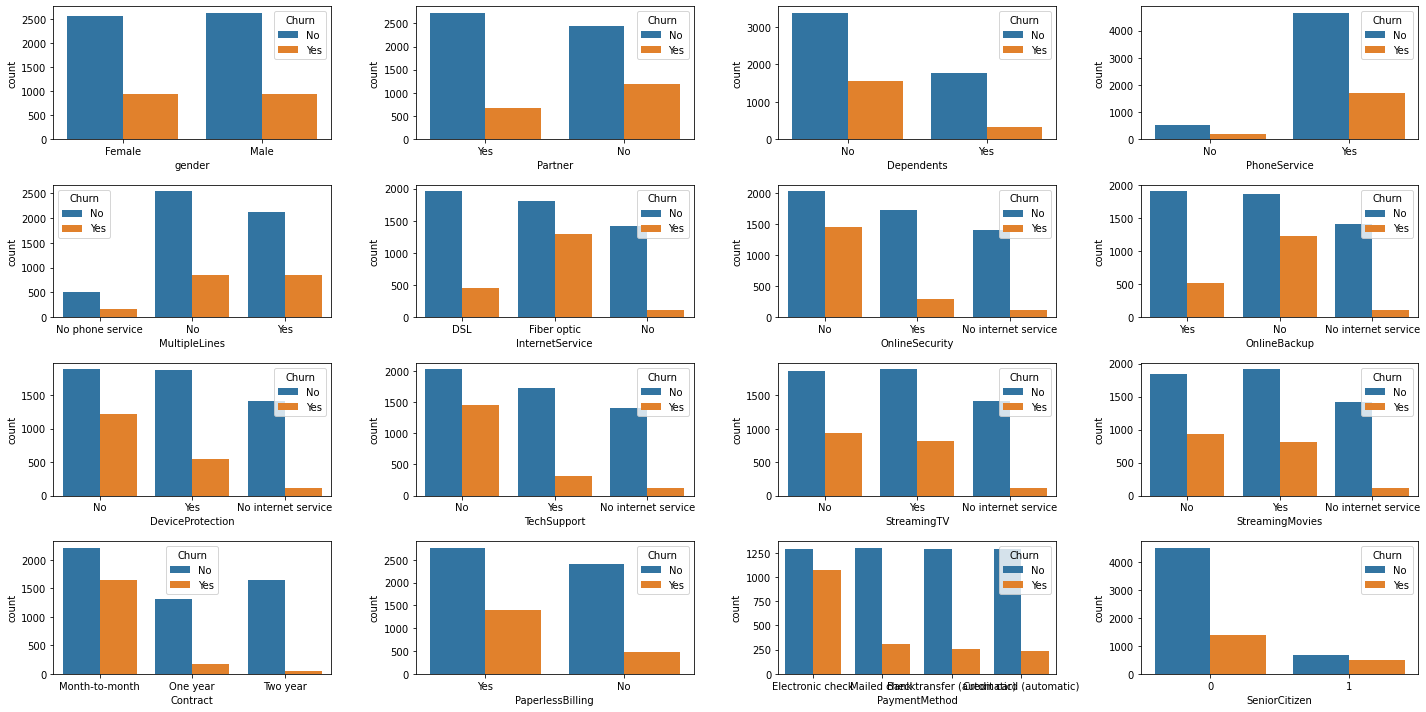

In [22]:
fig,axs=plt.subplots(nrows=4,ncols=4,figsize=(20,10))
axes=axs.flatten()
for i,col in enumerate(cat_features):
    sns.countplot(x=col,hue="Churn",data=df,ax=axes[i])
#adjust spacing between subplots
fig.tight_layout()
plt.show()

# Data Cleaning

In [23]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df = df.drop('customerID',axis=1)

In [25]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [27]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

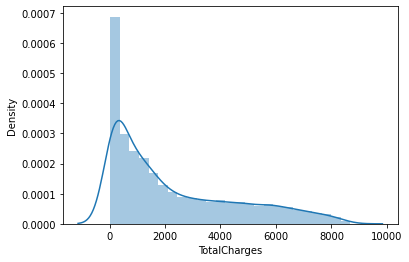

In [28]:
sns.distplot(df['TotalCharges'])

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
#encoding categorical values into numeric using label encoder
encoder = LabelEncoder()
for feature in df.select_dtypes(include='object').columns:
    df[feature]= encoder.fit_transform(df[feature])

In [31]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [32]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [33]:
#get correlation of churn with other variables
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

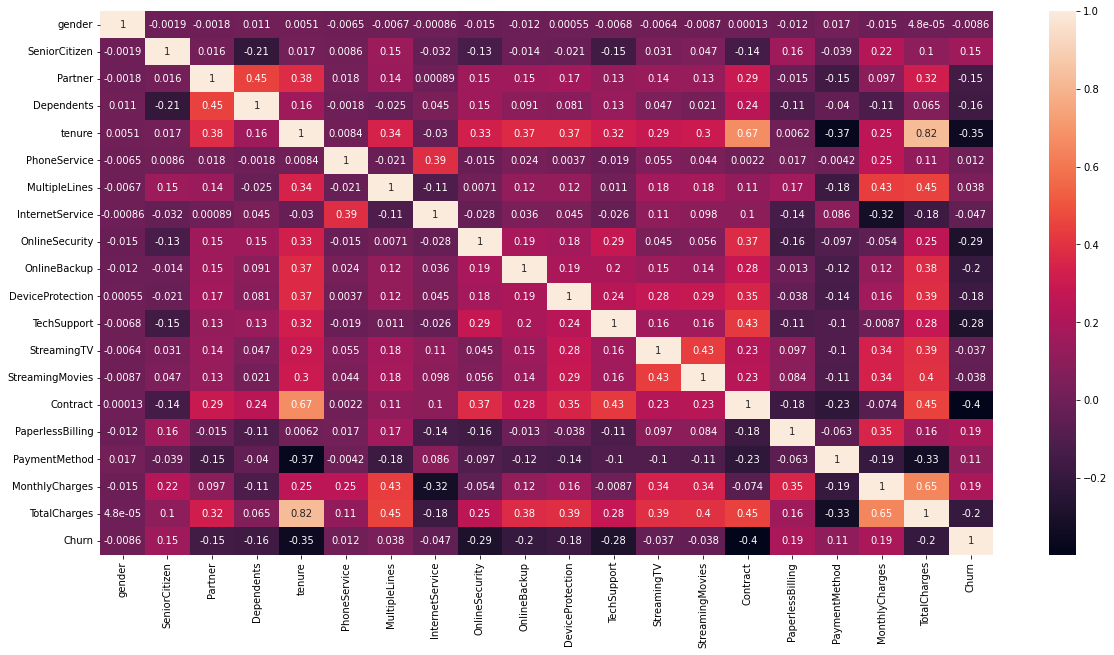

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

## since we are using ensemble methods for model building so there is no need of feature scaling as itsprediction is based on creating multiple decision tree

In [35]:
#seperating independent variables and target variable
x = df.drop('Churn',axis=1)
y = df['Churn']

In [36]:
x.shape

(7043, 19)

# Feature Selection
### selecting only 10 features which has higher correlation with churn

In [37]:
from sklearn.feature_selection import SelectKBest
select_feature = SelectKBest(k=10)
select_feature.fit(x,y)

SelectKBest()

In [38]:
#Top 10 high correlated features
select_feature.get_feature_names_out()

array(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [39]:
x = x[select_feature.get_feature_names_out()]

In [40]:
x.shape

(7043, 10)

### according to the feature selection we have selected 10 top features out of 19 features
### split data into training and validation set in 80:20 ratio

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
#its imbalance dataset
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [45]:
def evaluate_model_performance(model, test_data):
    
    prediction = model.predict(test_data)
    
    print("Validation Accuarcy : {:.2f}%".format(accuracy_score(y_test,prediction)))
    print("Precision Score : {:.2f}%".format(precision_score(y_test,prediction)))
    print("f1 Score : {:.2f}%".format(f1_score(y_test,prediction)))
    print("Recall : {:.2f}%".format(recall_score(y_test,prediction)))
    print(classification_report(y_test,prediction))
    

In [46]:
#Random Forest Model without balancing dataset and without hyper paramter tuning
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
#measure the performance of random forest model#measure the performance of random forest model
evaluate_model_performance(rand_forest,X_test)

Validation Accuarcy : 0.78%
Precision Score : 0.62%
f1 Score : 0.54%
Recall : 0.47%
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.62      0.47      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [48]:
#GradientBoostingClassifier without balancing dataset and without hyper paramter tuning
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [49]:
#measure the performance of GradientBoostingClassifier
evaluate_model_performance(gbc_model,X_test)

Validation Accuarcy : 0.81%
Precision Score : 0.67%
f1 Score : 0.59%
Recall : 0.53%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### as we can see our model is not performing up to the mark because of imbalance nature of dataset so wewill balance it to reduce TN,FN and increase TP,FP

In [50]:
from imblearn.combine import SMOTEENN

In [51]:
smote = SMOTEENN()
x_st,y_st=smote.fit_resample(x,y)

<AxesSubplot:>

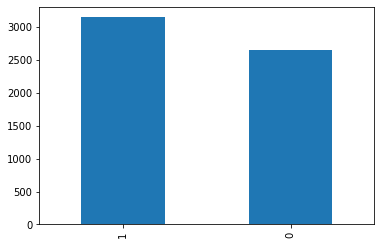

In [52]:
y_st.value_counts().plot(kind='bar')

### since we have performed SMOTEENN (combination of Smote + ENN) sampling method and we can seeour dataset is nearly balanced

### Building Model with Balanced Dataset and performance hyper parameter tuning using RandomSearchCV

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_st, y_st, test_size=0.2, random_state=42)

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
param_grid = {
    'n_estimators' : [40,80,120,160,200],
    'max_depth':[2,4,6,8,10],
    'criterion':['gini'],
    'random_state':[27,42,43]   
}

random_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid)
random_search_cv.fit(x_st,y_st)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 80, 120, 160, 200],
                                        'random_state': [27, 42, 43]})

In [56]:
random_search_cv.best_params_

{'random_state': 43, 'n_estimators': 160, 'max_depth': 10, 'criterion': 'gini'}

In [57]:
rf_final_model = random_search_cv.best_estimator_

In [58]:
evaluate_model_performance(rf_final_model,X_test)

Validation Accuarcy : 0.99%
Precision Score : 0.98%
f1 Score : 0.99%
Recall : 1.00%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       540
           1       0.98      1.00      0.99       618

    accuracy                           0.99      1158
   macro avg       0.99      0.99      0.99      1158
weighted avg       0.99      0.99      0.99      1158



In [59]:
# Save Final Model Integration with application
import pickle
file=open("trained_model.pkl","wb")
pickle.dump(rf_final_model,file)
file.close()

## Conclusion : After balancing the dataset using smootenn and hyper paramter tuning model performance has increase and the highest f1 score we are getting is 99%.